# Neural Networks

In this lesson, we'll learn how to train two kinds of artificial neural networks to detect handwritten digits in an image. By the end of this lesson, students will be able to:

- Identify neural network model parameters and hyperparameters.
- Determine the number of weights and biases in a multilayer perceptron and convolutional neural network.
- Explain how the layers of a convolutional neural network extract information from an input image.

First, let's watch the beginning of 3Blue1Brown's introduction to neural networks while we wait for the imports and dataset to load. We'll also later explore the [**TensorFlow Playground**](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.67725&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to learn more about neural networks from the perspective of linear models.

In [1]:
%%html
<iframe width="640" height="360" src="https://www.youtube-nocookie.com/embed/aircAruvnKk?start=163&end=331" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

For this lesson, we'll re-examine machine learning algorithms from scikit-learn. We'll also later use `keras`, a machine learning library designed specifically for building complex neural networks.

In [2]:
!pip install -q keras tensorflow-cpu

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt

We'll be working with the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), which is composed of 70,000 images of handwritten digits, of which 60,000 were drawn from employees at the U.S. Census Bureau and 10,000 drawn from U.S. high school students.

In the video clip above, we saw how to transform an image from a 28-by-28 square to a 784-length vector that takes each of the 28 rows of 28-wide pixels and arranges them side-by-side in a line. This process **flattens** the image from 2 dimensions to 1 dimension.

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")
X = X / 255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because the MNIST dataset already comes flattened, if we want to display any one image, we need to `reshape` it back to a 28-by-28 square.

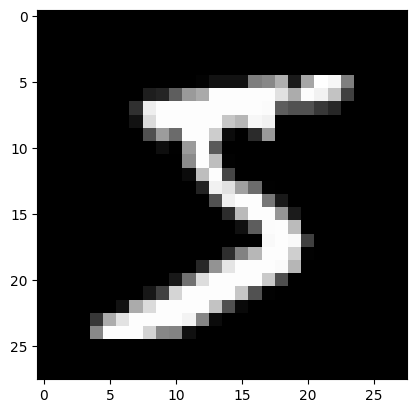

In [4]:
plt.imshow(X.loc[0].to_numpy().reshape(28, 28), cmap="gray")

## Multilayer perceptrons

To create a neural network, scikit-learn provides an `MLPClassifier`, or **multilayer perceptron** classifier, that can be used to match the video example with two hidden layers of 16 neurons each. While we wait for the training to complete, let's watch the rest of the video.

In [5]:
%%html
<iframe width="640" height="360" src="https://www.youtube-nocookie.com/embed/aircAruvnKk?start=332&end=806" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [6]:
mlp_16x16 = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=50, verbose=True)
%time mlp_16x16.fit(X_train, y_train)
mlp_16x16.score(X_test, y_test)

Iteration 1, loss = 0.88224631
Iteration 2, loss = 0.33025720
Iteration 3, loss = 0.27519200
Iteration 4, loss = 0.24491488
Iteration 5, loss = 0.22507454
Iteration 6, loss = 0.20833323
Iteration 7, loss = 0.19678727
Iteration 8, loss = 0.18688042
Iteration 9, loss = 0.17818118
Iteration 10, loss = 0.17165433
Iteration 11, loss = 0.16458698
Iteration 12, loss = 0.15995754
Iteration 13, loss = 0.15544063
Iteration 14, loss = 0.15006215
Iteration 15, loss = 0.14617232
Iteration 16, loss = 0.14114922
Iteration 17, loss = 0.13865221
Iteration 18, loss = 0.13467452
Iteration 19, loss = 0.13244198
Iteration 20, loss = 0.12945921
Iteration 21, loss = 0.12653887
Iteration 22, loss = 0.12397927
Iteration 23, loss = 0.12322810
Iteration 24, loss = 0.12092652
Iteration 25, loss = 0.11946801
Iteration 26, loss = 0.11597461
Iteration 27, loss = 0.11590184
Iteration 28, loss = 0.11325672
Iteration 29, loss = 0.11242498
Iteration 30, loss = 0.11048659
Iteration 31, loss = 0.10833732
Iteration 32, los

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9544285714285714

Neural networks are highly sensistive to hyperparameter values such as the width and depth of hidden layers. Other hyperparameter values like the initial learning rate for gradient descent can also affect training efficacy. Early stopping is used to evaluate performance on a validation set accuracy (rather than training set loss) in order to determine when to stop training.

In [7]:
mlp_40 = MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.001, early_stopping=True, verbose=True)
%time mlp_40.fit(X_train, y_train)
mlp_40.score(X_test, y_test)

Iteration 1, loss = 0.59029784
CPU times: user 1.28 s, sys: 201 ms, total: 1.48 s
Wall time: 1.02 s


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

We can also [visualize MLP weights (coefficients) on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html). These 28-by-28 images represent each of the 40 neurons in this single-layer neural network.

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(12.5, 5))
# Constrain plots to the same scale (divided by 2 for better display)
vmin, vmax = mlp_40.coefs_[0].min() / 2, mlp_40.coefs_[0].max() / 2
for ax, coef in zip(axs.ravel(), mlp_40.coefs_[0].T):
    activations = coef.reshape(28, 28)
    ax.matshow(activations, vmin=vmin, vmax=vmax)
    ax.set_axis_off()

## Convolutional neural networks

In the 3Blue1Brown video, we examined how a single neuron could serve as an edge detector. But in a plain multilayer perceptron, neurons are linked directly to specific inputs (or preceding hidden layers), so they are location-sensitive. The MNIST dataset was constructed by centering each digit individually in the middle of the box. In the real-world, we might not have such perfectly-arranged image data, particularly when we want to identify real-world objects in a complex scene (which is probably harder than identifying handwritten digits centered on a black background).

**Convolutional neural networks** take the idea of a neural network and applies it to learn the weights in a convolution kernel.

The [following example](https://keras.io/examples/vision/mnist_convnet/), courtesy of François Chollet (the original author of Keras), shows how to load in the MNIST dataset using Keras.

In [ ]:
import keras
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the data as (N, 28, 28) images split between 80% train set and 20% test set
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale image values from [0, 255] to [0, 1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Add an extra dimension to each image (28, 28, 1) as Keras requires at least 1 "color" channel
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
input_shape = (28, 28, 1)
assert X_train.shape[1:] == input_shape and X_test.shape[1:] == input_shape

# Convert a class vector (integers) to binary class matrix
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Display an image without any need to reshape
plt.imshow(X_train[0], cmap="gray")

The Keras `Sequential` model allows us to specify the specific sequence of layers and operations to pass from one step to the next.

- The `Input` layer handles inputs of the given shape.
- The `Conv2D` layer learns a convolution kernel with `kernel_size` number of weights plus a bias. It outputs the given number of `filters`, such as 32 or 64 used in the example below.
- The `MaxPooling2D` layer to downsample the output from a `Conv2D` layer. The maximum value in each 2-by-2 window is passed to the next layer.
- The `Flatten` layer flattens the given data into a single dimension.
- The `Dropout` layer randomly sets input values to 0 at the given frequency during training to help prevent overfitting. (Bypassed during **inference**: evaluation or use of the model.)
- The `Dense` layer is a regular densely-connected neural network layer like what we learned before.

Whereas `MLPClassifier` counted an entire round through the training data as an iteration, Keras uses the term **epoch** to refer to the same idea of iterating through the entire training dataset and performing gradient descent updates accordingly. Here, each gradient descent update step examines 200 images each time, so there are a total of 270 update steps for the 54000 images in the training set.

In [ ]:
# Build the model: in Keras, kernel_size is specified as (height, width)
kernel_size = (3, 3)
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=kernel_size, activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=kernel_size, activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax"),
])
model.summary(line_length=80)

# Train and evaluate the model (same loss, gradient descent optimizer, and metric as MLPClassifier)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
%time model.fit(X_train, y_train, batch_size=100, epochs=10, validation_split=0.1)

# Show the accuracy score on the test set
model.evaluate(X_test, y_test, verbose=0)[1]

## Practice: Multilayer perceptron in Keras

Write Keras code to recreate the two-hidden-layer multilayer perceptron model that we built using scikit-learn with the expression `MLPClassifier(hidden_layer_sizes=(16, 16))`. For the hidden layers, specify `activation="relu"` to match scikit-learn.

In [ ]:
# Build the model
mlp_keras = keras.Sequential([
    ...
])
mlp_keras.summary(line_length=80)

# Train and evaluate the model (same loss, gradient descent optimizer, and metric as MLPClassifier)
mlp_keras.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
%time mlp_keras.fit(X_train, y_train, batch_size=100, epochs=10, validation_split=0.1)

# Show the accuracy score on the test set
mlp_keras.evaluate(X_test, y_test, verbose=0)[1]

## Visualizing a convolutional neural network

To visualize a convolutional layer, we can apply a similar technique to plot the weights for each layer. Below are the 32 convolutional kernels learned by the first `Conv2D` layer.

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(10, 5))
conv2d = model.layers[0].weights[0].numpy()
vmin = conv2d.min()
vmax = conv2d.max()
for ax, coef in zip(axs.ravel(), conv2d.T):
    ax.matshow(coef[0].T, vmin=vmin, vmax=vmax)
    for y in range(kernel_size[0]):
        for x in range(kernel_size[1]):
            # Display the weight values rounded to 1 decimal place
            ax.text(x, y, round(coef[0, x, y], 1), va="center", ha="center")
    ax.set_axis_off()

The remaining `Conv2D` and `Dense` layers become much harder to visualize because they have so many weights to examine. So let's instead [visualize how the network activates in response to a sample image](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/first_edition/5.4-visualizing-what-convnets-learn.ipynb). The first plot below shows the result of convolving each of the above kernels on a sample image. The kernels above act as edge detectors.

In [ ]:
# Construct a debugging model for extracting each layer activation from the real model
activations = models.Model(
    inputs=model.inputs,
    # Only include the first 4 layers (conv2d, max_pooling2d, conv2d_1, max_pooling2d_1)
    outputs=[layer.output for layer in model.layers[:4]],
).predict(X_train[0:1])

# Show how the input image responds to a convolution using the very first filter (kernel) above
plt.imshow(activations[0][0, ..., 0], cmap="gray")

Let's compare this result to another kernel by examining the table of filters above and changing the last indexing digit to a different value between 0 and 31.

In [ ]:
plt.imshow(activations[0][0, ..., 0], cmap="gray")

The activations from this first layer are passed as inputs to the `MaxPooling2D` second layer, and so forth. We can visualize this whole process by creating a plot that shows how the inputs flow through the model.

In [ ]:
images_per_row = 8

for i, activation in enumerate(activations):
    # Assume square images: image size is the same width or height
    assert activation.shape[1] == activation.shape[2]
    size = activation.shape[1]
    # Number of features (filters, learned kernels, etc) to display
    n_features = activation.shape[-1]
    n_cols = n_features // images_per_row

    # Tile all the images onto a single large grid; too many images to display individually
    grid = np.zeros((size * n_cols, images_per_row * size))
    for row in range(images_per_row):
        for col in range(n_cols):
            channel_image = activation[0, ..., col * images_per_row + row]
            grid[col * size:(col + 1) * size, row * size:(row + 1) * size] = channel_image

    # Display each grid with the same width
    scale = 1.2 / size
    plt.figure(figsize=(scale * grid.shape[1], scale * grid.shape[0]))
    plt.imshow(grid, cmap="gray")
    plt.title(model.layers[i].name)
    plt.grid(False)

What patterns do you notice about the visual representation of the handwritten digit as we proceed deeper into the convolutional neural network?